In [199]:
import pylab as pl
import scipy as sp
import numpy as np
from scipy.io import loadmat
import pdb

from sklearn.metrics import accuracy_score

In [200]:
def load_data(fname):
    # load the data
    data = loadmat(fname)
    # extract images and labels
    imgs = data['data_patterns']
    labels = data['data_labels']
    return imgs, labels


In [201]:
def digits(digit):
    fname = "usps.mat"
    imgs,labels = load_data(fname)
    # we only want to classify one digit 
    labels = np.sign((labels[digit,:]>0)-.5)

    # please think about what the next lines do
    permidx = np.random.permutation(np.arange(imgs.shape[-1]))
    trainpercent = 70.
    stopat = np.floor(labels.shape[-1]*trainpercent/100.)
    stopat= int(stopat)
    
    # cut segment data into train and test set into two non-overlapping sets:
    X = imgs[:,:stopat]
    Y = labels[:stopat]
    Xtest = imgs[:, stopat:]
    Ytest = labels[stopat:] 
    #check that shapes of X and Y make sense..
    # it might makes sense to print them
    
    mu,acc_ncc = ncc_train(X,Y,Xtest,Ytest)

    fig = pl.figure(figsize=(10,5))
    ax1 = fig.add_subplot(1,2,1)
    ax1.plot(acc_ncc*100.)
    pl.xlabel('Iterations')
    pl.title('NCC')
    pl.ylabel('Accuracy [%]')

    #and imshow the weight vector
    ax2 = fig.add_subplot(1,2,2)
    # reshape weight vector
    weights = np.reshape(mu[:,-1],(int(np.sqrt(imgs.shape[0])),int(np.sqrt(imgs.shape[0]))))
    # plot the weight image
    imgh = ax2.imshow(weights)
    # with colorbar
    pl.colorbar(imgh)
    ax2.set_title('NCC Centroid')
    # remove axis ticks
    pl.xticks(())
    pl.yticks(())
    # remove axis ticks
    pl.xticks(())
    pl.yticks(())

    # write the picture to pdf
    fname = 'NCC_digits-%d.pdf'%digit
    pl.savefig(fname)


In [202]:
def ncc_train(X,Y,Xtest,Ytest):
    # initialize accuracy vector
    acc = np.zeros(X.shape[-1])
    # unique class labels
    cids = np.unique(Y)
    # initialize mu, shape should be (256,2) - why? 
    mu = np.zeros(shape = (256,2))
    # initialize counter , shape should be (2,) - why?
    Nk = np.zeros(shape = (2,))
    # loop over all data points in training set
    for n in range(len(X.T)):
        # set idx to current class label
        idx = cids==Y[n]
        # update mu
        mu[:,idx] = ((Nk/(Nk[idx]+1))[idx] * mu[:,idx]) + (X.T[n]/((Nk[idx]+1))).reshape(256,1)
        # mu[:,idx] = ((Nk[idx]/(Nk[idx]+1))[idx] * mu[:,idx]) + (X.T[n]/((Nk[idx]+1))).reshape(256,1)
        # update counter
        Nk[idx] = Nk[idx] + 1
        # predict test labels with current mu
        yhat = predict_ncc(Xtest,mu)
        yhat = 2*yhat - 1
        yhat = yhat.astype(np.float64)
        # calculate current accuracy with test labels
        acc[n] = np.mean(yhat == Ytest)
        # return weight vector and error
    print(acc)
    return mu,acc


In [203]:
def predict_ncc(X,mu):
    # do nearest-centroid classification
    # initialize distance matrix with zeros and shape (602,2) - why?
    NCdist = NCdist = np.zeros(shape = (603,2))
    # compute euclidean distance to centroids
    # loop over both classes
    for ic in np.arange(mu.shape[-1]):
        # calculate distances of every point to centroid
        # in one line
        #NCdist[:,ic] = (X.T).dot(mu[:,ic])
        NCdist[:,ic]  = np.linalg.norm(X.T-mu[:,ic], axis=1)
    # assign the class label of the nearest (euclidean distance) centroid
    Yclass = NCdist.argmin(axis=1)
    return Yclass

[0.78441128 0.83416252 0.87064677 ... 0.89386401 0.89718076 0.89718076]
[0.51741294 0.68325041 0.75290216 ... 0.93698176 0.93698176 0.93698176]
[0.68490879 0.77777778 0.83747927 ... 0.95190713 0.95190713 0.95190713]
[0.66169154 0.82421227 0.88391376 ... 0.87064677 0.87064677 0.87064677]
[0.61028192 0.77943615 0.84908789 ... 0.87893864 0.87893864 0.87893864]
[0.70149254 0.81426202 0.84079602 ... 0.82587065 0.82587065 0.82421227]
[0.66998342 0.79436153 0.8358209  ... 0.90547264 0.90547264 0.90547264]
[0.61028192 0.77943615 0.84908789 ... 0.90215589 0.90215589 0.90215589]
[0.64344942 0.8026534  0.86567164 ... 0.83747927 0.83747927 0.83747927]


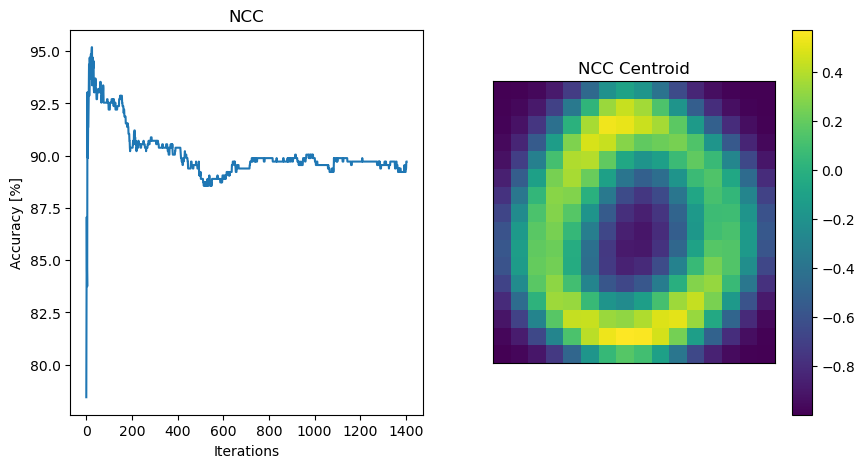

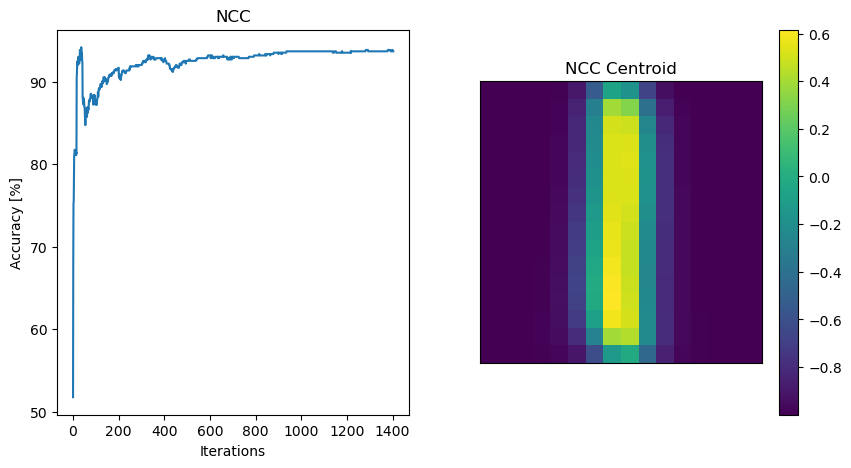

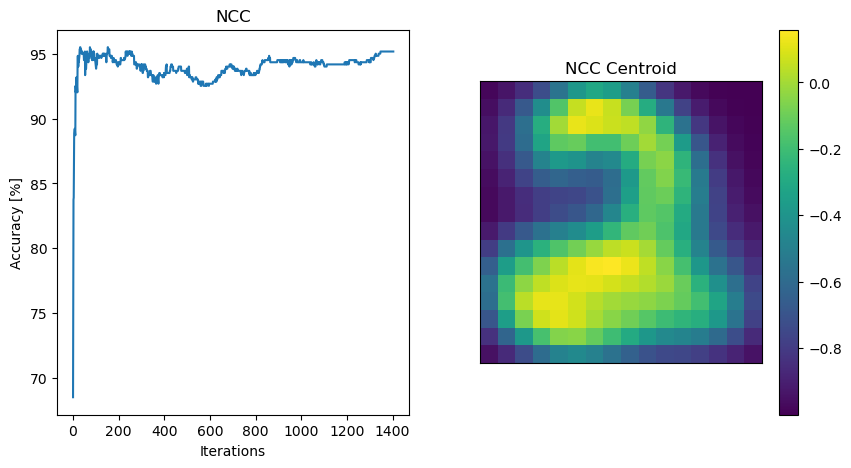

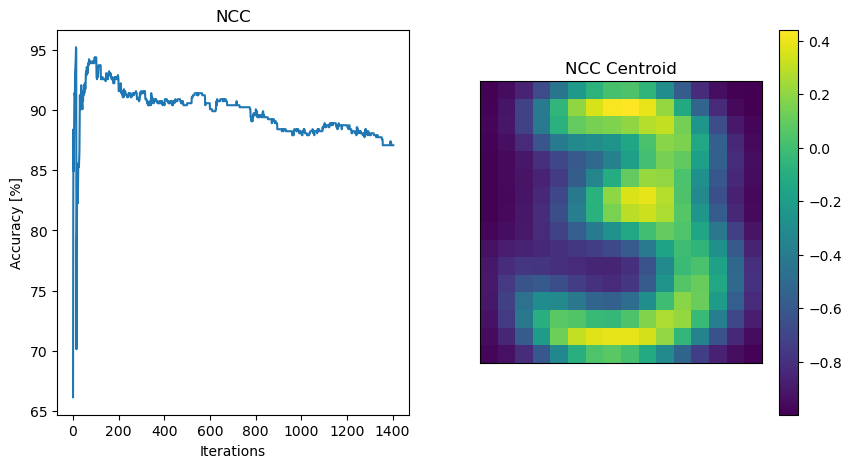

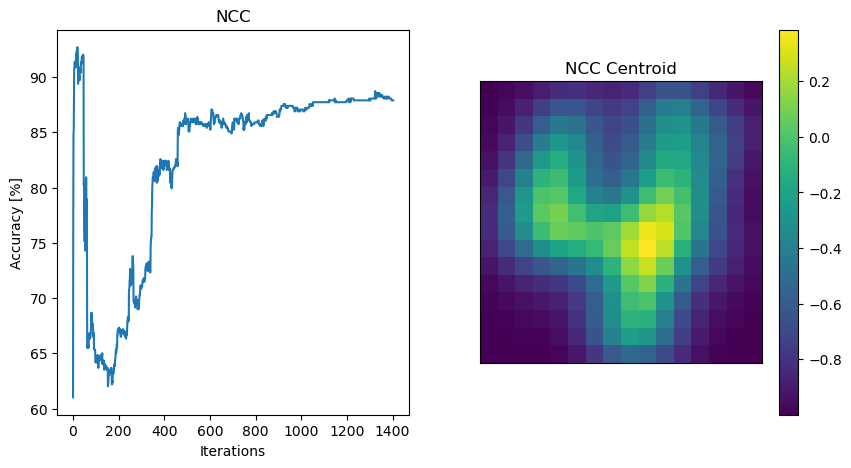

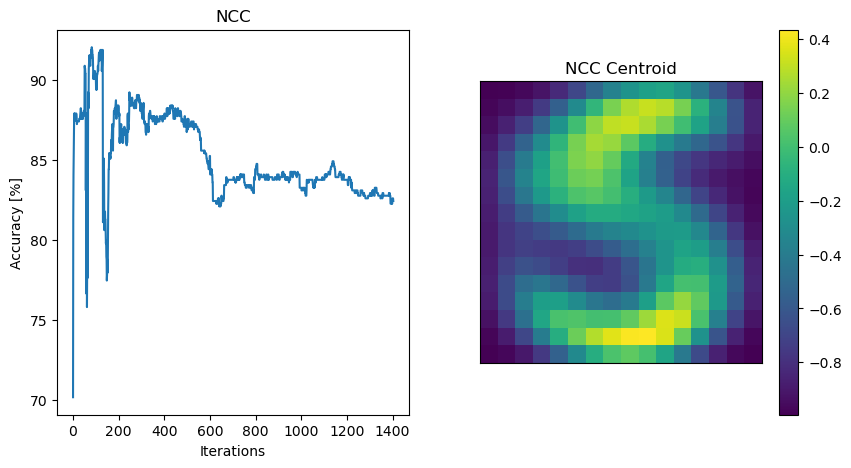

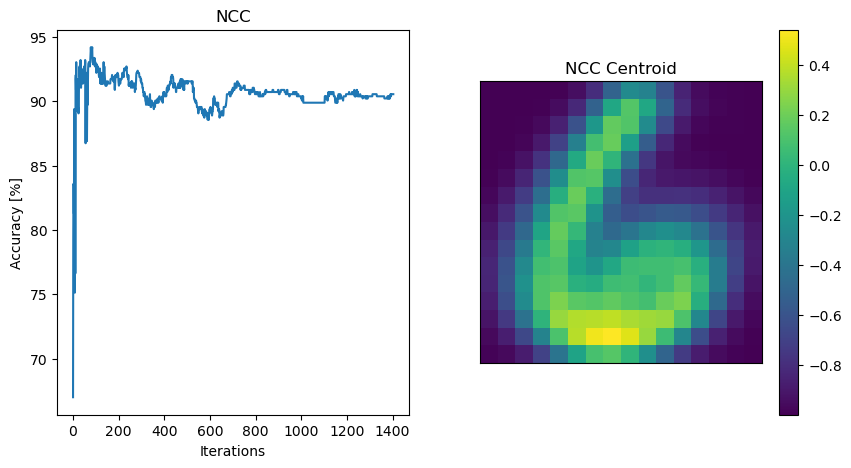

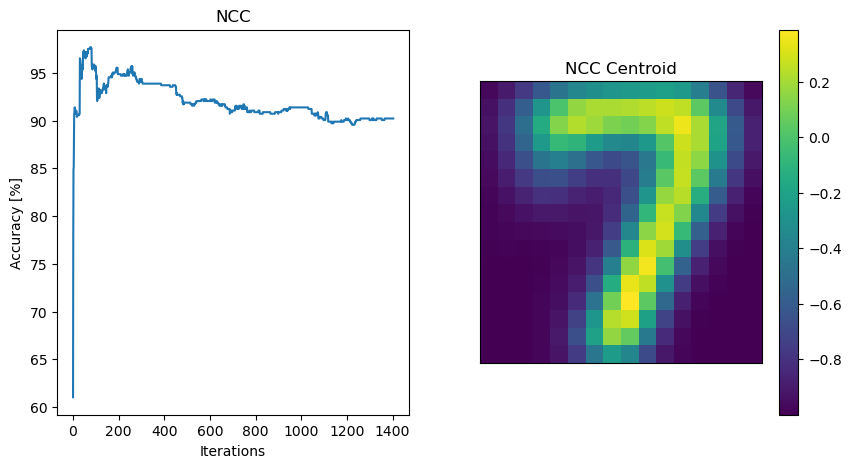

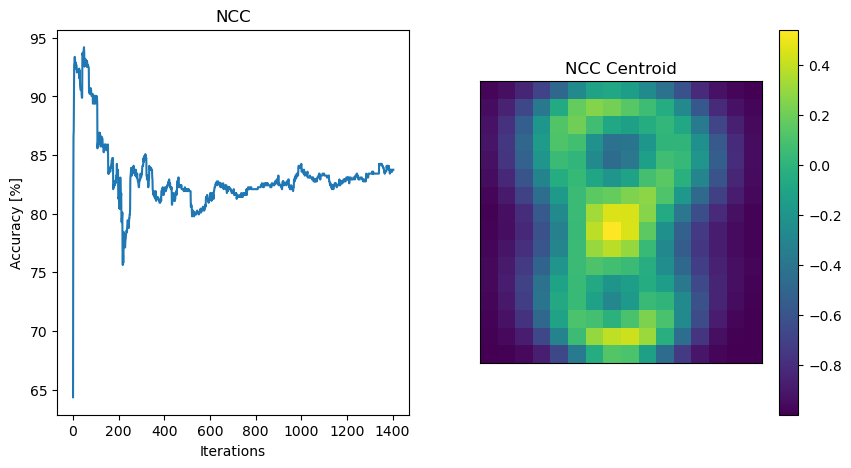

In [204]:
for digit in range(9):
    digits(digit)